# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-7.1.-One-versus-All-classification-pseudo-code" data-toc-modified-id="Exercise-7.1.-One-versus-All-classification-pseudo-code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 7.1. One-versus-All classification pseudo-code</a></div><div class="lev1 toc-item"><a href="#Exercise-7.2.--One-versus-All-classification" data-toc-modified-id="Exercise-7.2.--One-versus-All-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 7.2.  One-versus-All classification</a></div><div class="lev1 toc-item"><a href="#Exercise-7.3.--Multi-class-Perceptron" data-toc-modified-id="Exercise-7.3.--Multi-class-Perceptron-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 7.3.  Multi-class Perceptron</a></div><div class="lev1 toc-item"><a href="#Exercise-7.4.-The-multi-class-and-two-class-Perceptrons" data-toc-modified-id="Exercise-7.4.-The-multi-class-and-two-class-Perceptrons-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 7.4. The multi-class and two-class Perceptrons</a></div><div class="lev1 toc-item"><a href="#Exercise-7.5.-Multi-class-Softmax" data-toc-modified-id="Exercise-7.5.-Multi-class-Softmax-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 7.5. Multi-class Softmax</a></div><div class="lev1 toc-item"><a href="#Exercise-7.6.-Show-the-multi-class-Softmax-reduces-to-two-class-Softmax-when-C=2" data-toc-modified-id="Exercise-7.6.-Show-the-multi-class-Softmax-reduces-to-two-class-Softmax-when-C=2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 7.6. Show the multi-class Softmax reduces to two-class Softmax when $C=2$</a></div><div class="lev1 toc-item"><a href="#Exercise-7.7.-Hand-calculations-with-the-multi-class-Softmax-cost" data-toc-modified-id="Exercise-7.7.-Hand-calculations-with-the-multi-class-Softmax-cost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 7.7. Hand-calculations with the multi-class Softmax cost</a></div><div class="lev1 toc-item"><a href="#Exercise-7.8.-The-multi-class-Perceptron-and-Softmax-costs-are-convex" data-toc-modified-id="Exercise-7.8.-The-multi-class-Perceptron-and-Softmax-costs-are-convex-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 7.8. The multi-class Perceptron and Softmax costs are convex</a></div><div class="lev1 toc-item"><a href="#Exercise-7.9.-Balanced-accuracy-in-the-multi-class-setting" data-toc-modified-id="Exercise-7.9.-Balanced-accuracy-in-the-multi-class-setting-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 7.9. Balanced accuracy in the multi-class setting</a></div><div class="lev1 toc-item"><a href="#Exercise-7.10.--Weighted-multi-class-Softmax" data-toc-modified-id="Exercise-7.10.--Weighted-multi-class-Softmax-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 7.10.  Weighted multi-class Softmax</a></div><div class="lev1 toc-item"><a href="#Exercise-7.11.--Recognizing-handwritten-digits" data-toc-modified-id="Exercise-7.11.--Recognizing-handwritten-digits-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Exercise 7.11.  Recognizing handwritten digits</a></div>

In [7]:
# load in basic libraries and autograd wrapped numpy
from autograd import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
datapath = '../mlrefined_datasets/superlearn_datasets/'

# imports from custom library
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np

# demos for this notebook
regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer();
plotter = superlearn.multi_outupt_plotters

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 7.1. One-versus-All classification pseudo-code


Below we provide a formal pseudo-code summarizing these steps.

![title](img/ova_pseudo_code.png)

# Exercise 7.2.  One-versus-All classification

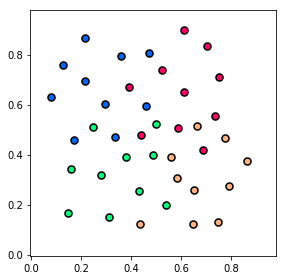

In [2]:
# load in dataset
csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',');

# create an instance of the ova demo
demo = superlearn.ova_illustrator.Visualizer(data);

# visualize dataset
demo.show_dataset();

In [5]:
# solve the 2-class subproblems
demo.solve_2class_subproblems()

<IPython.core.display.Javascript object>


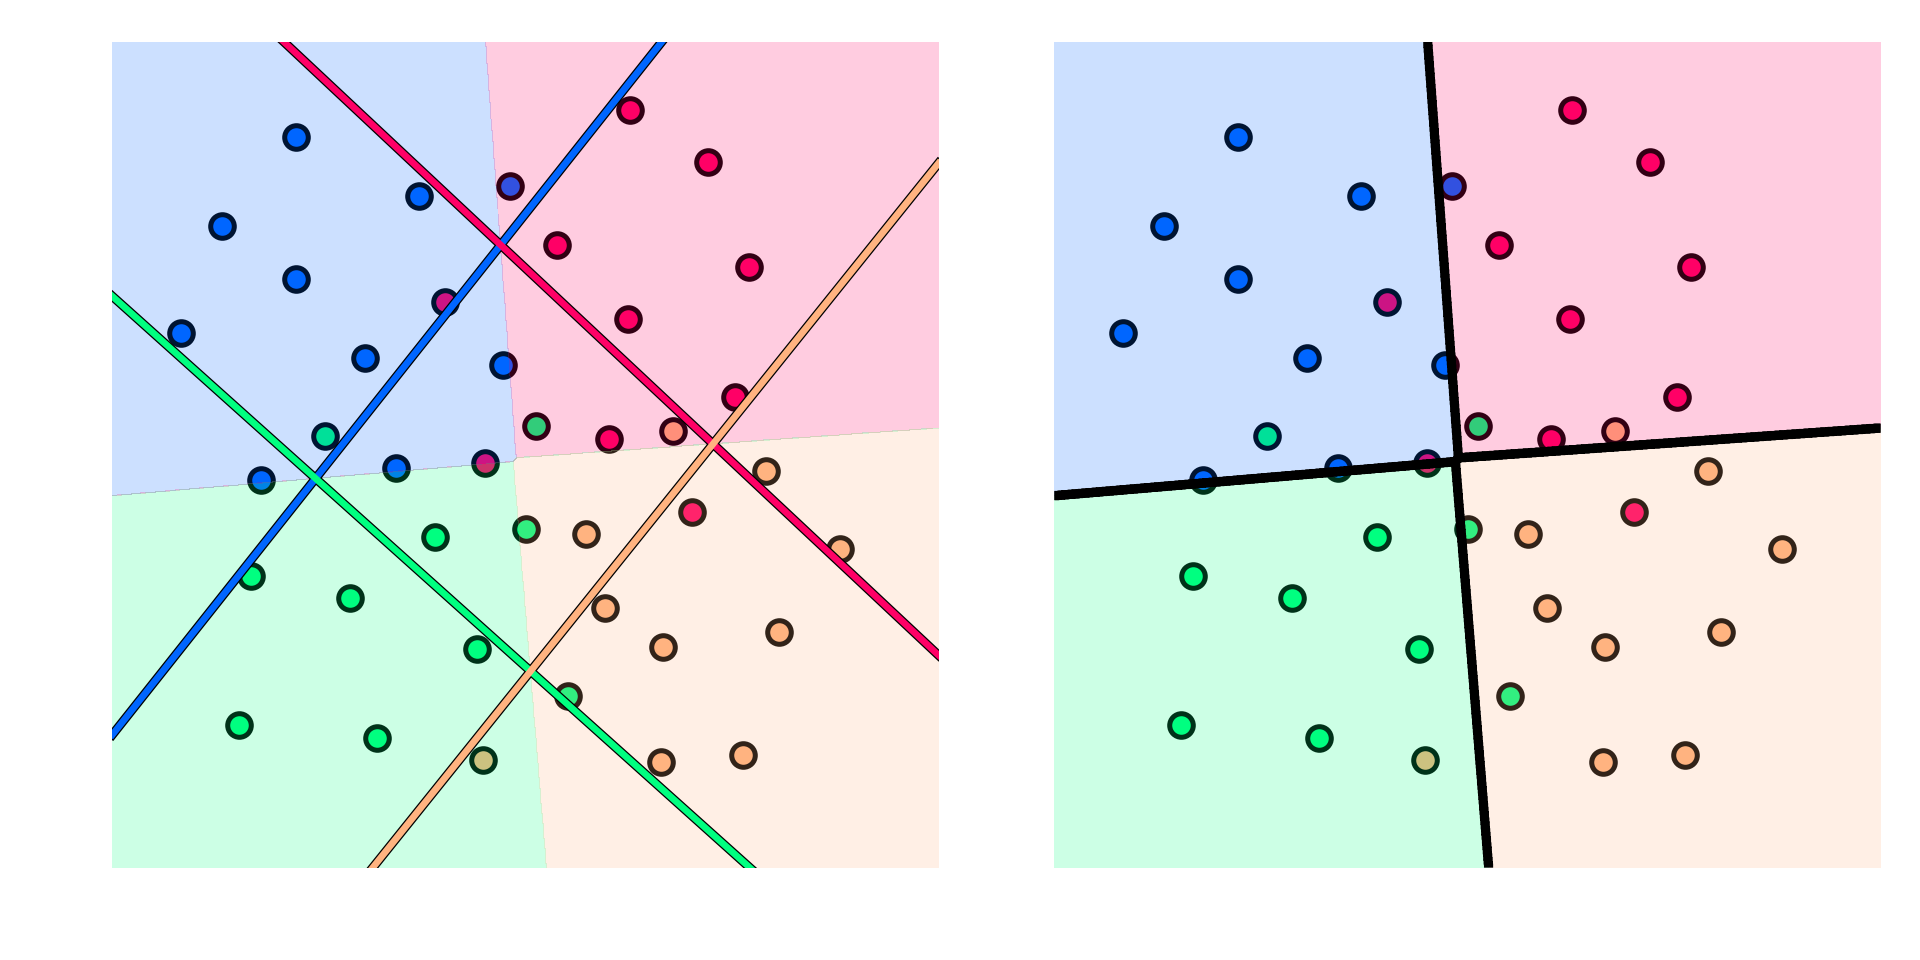

In [18]:
# classify and color the entire space using our individual classifiers and the fusion rule
demo.show_complete_coloring()

# Exercise 7.3.  Multi-class Perceptron

In [19]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [20]:
lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

<IPython.core.display.Javascript object>


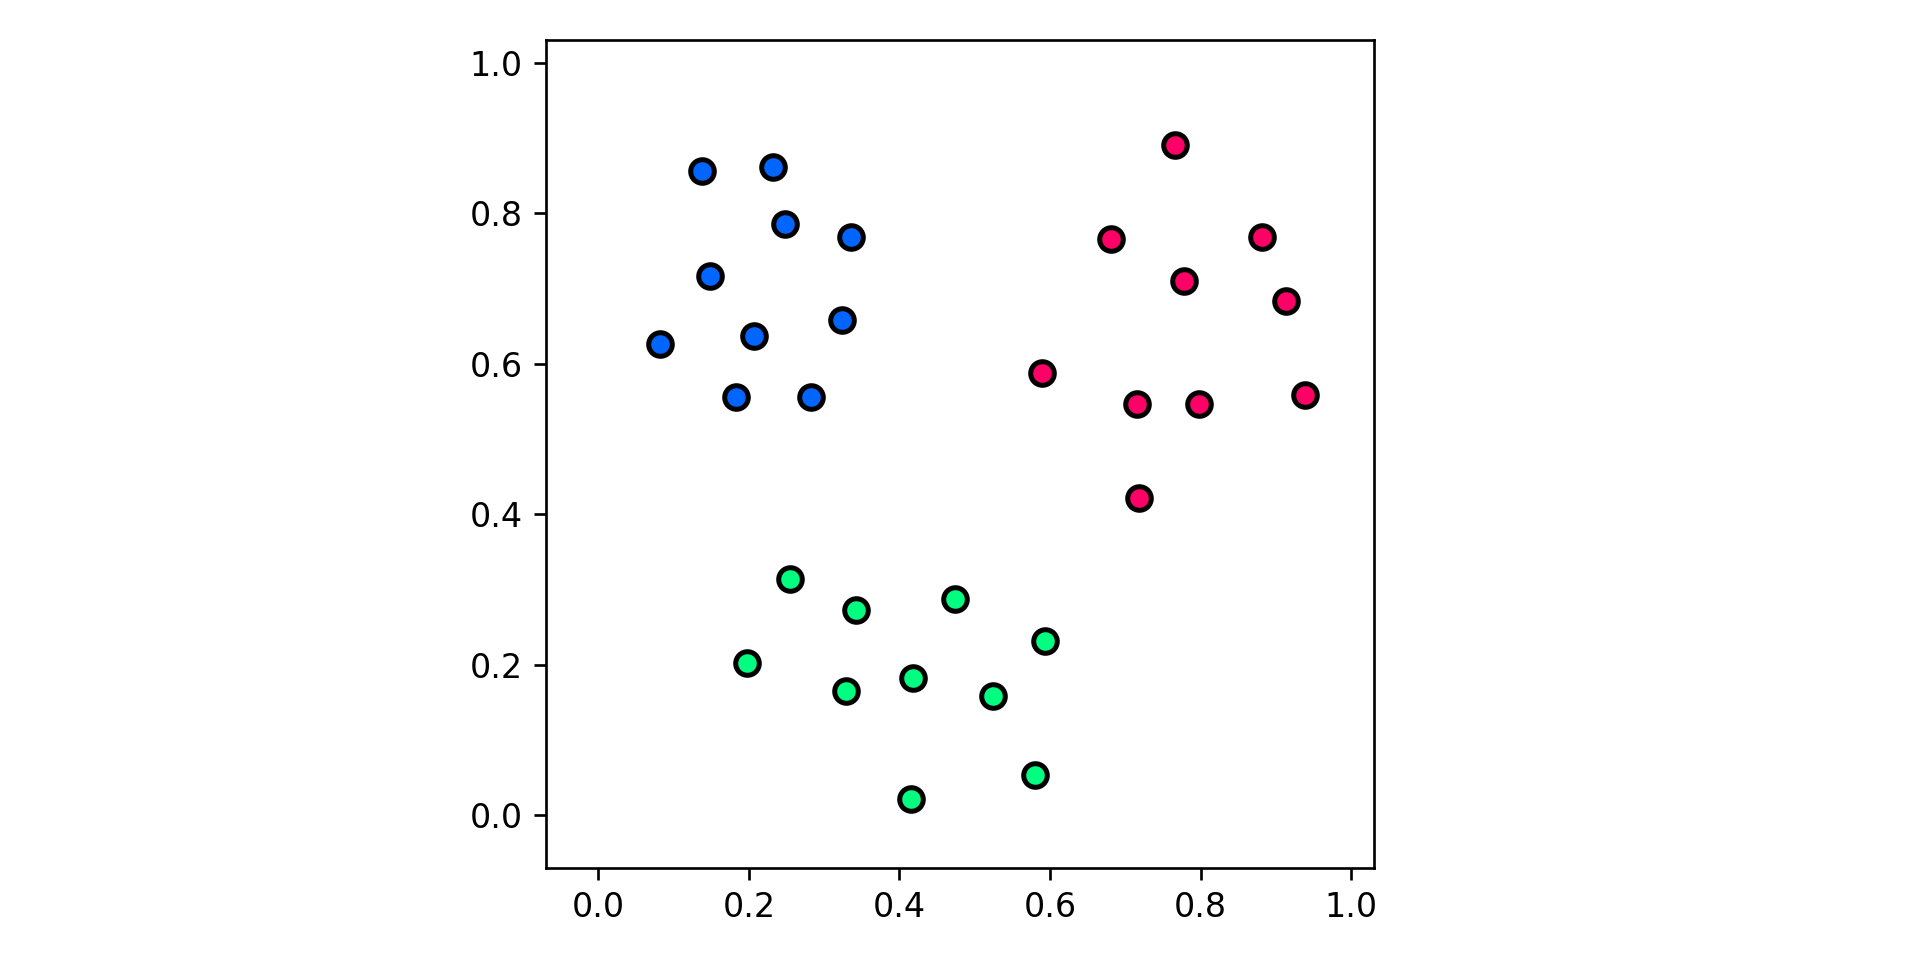

In [21]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data = np.loadtxt(datapath + '3class_data.csv',delimiter = ',')

# create an instance of the ova demo
demo = superlearn.multiclass_illustrator.Visualizer(data)

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# visualize dataset
demo.show_dataset()

# run gradient descent to minimize cost
g = multiclass_perceptron; w = 0.1*np.random.randn(3,3); max_its = 1000; alpha_choice = 10**(-1);
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

<IPython.core.display.Javascript object>


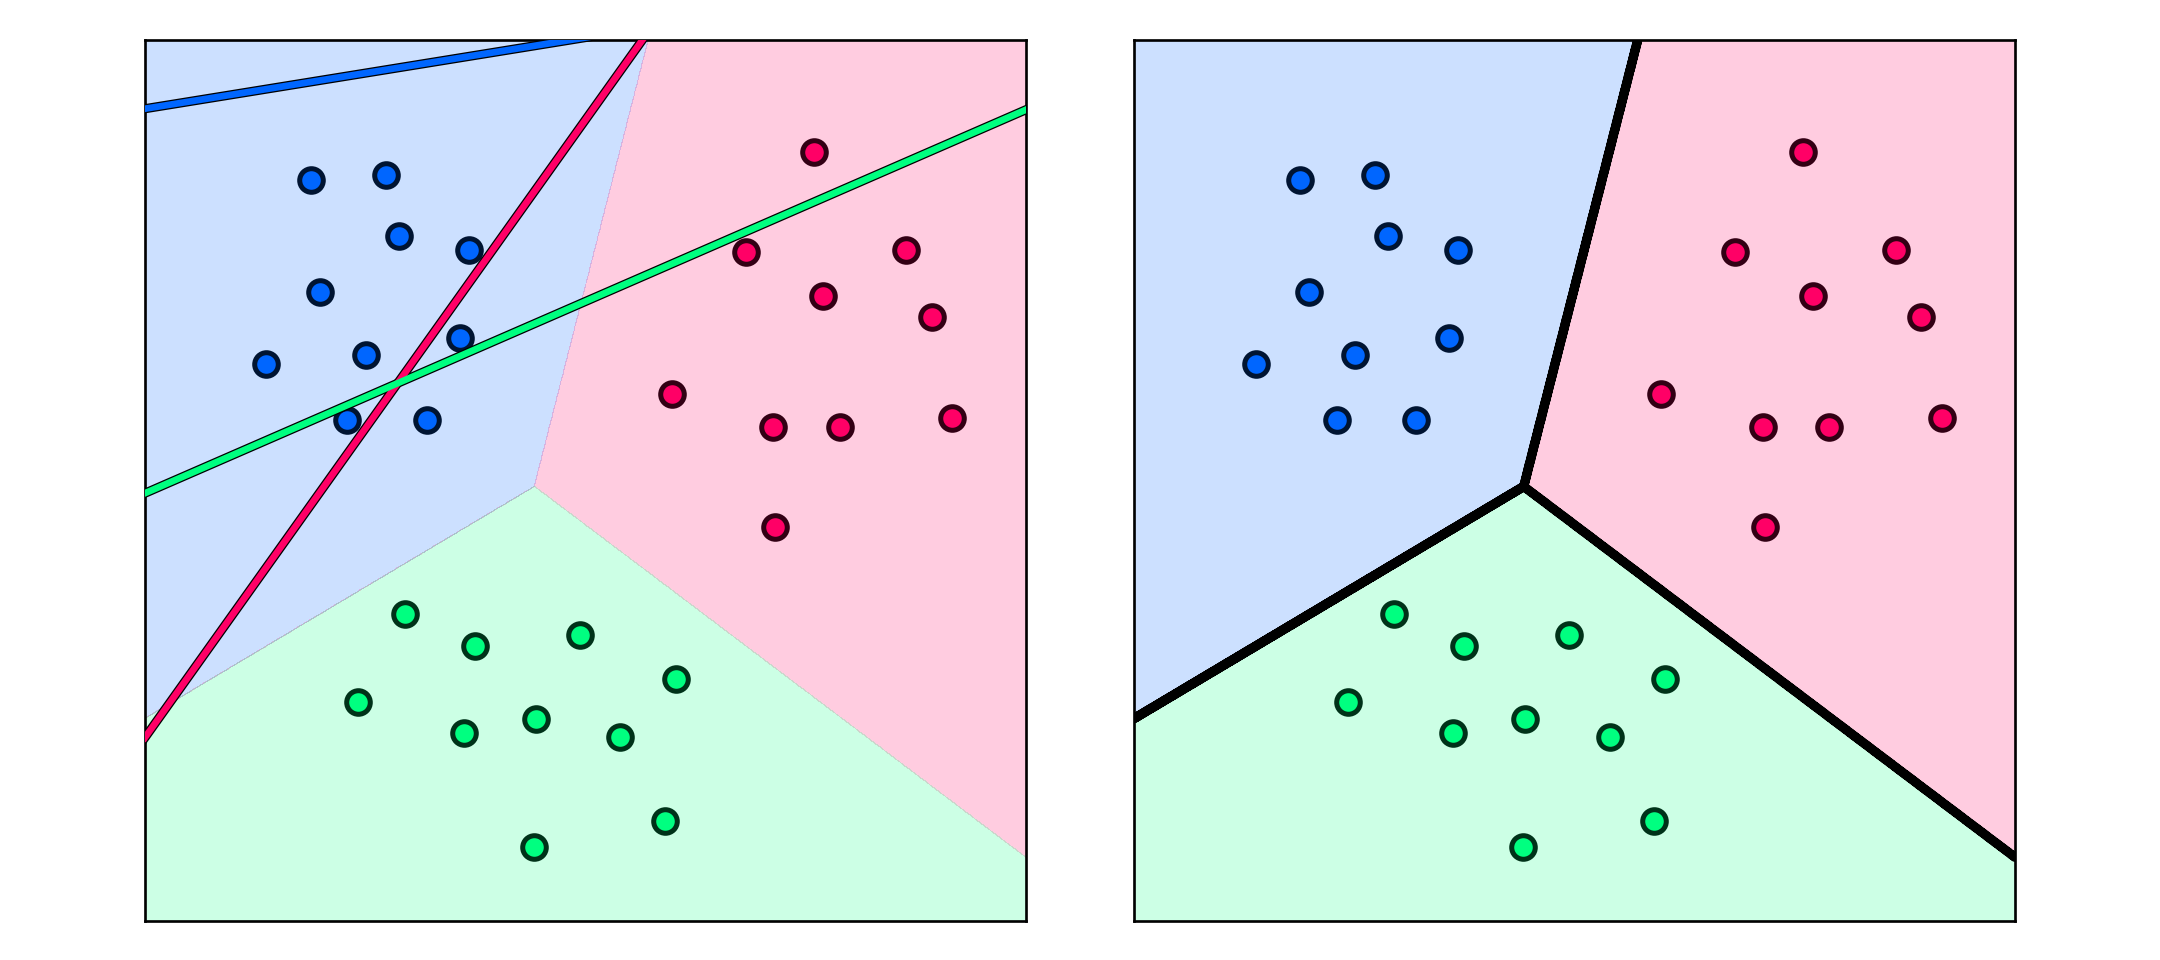

In [22]:
# This code cell will not be shown in the HTML version of this notebook
# plot classification of space, individual learned classifiers (left panel) and joint boundary (middle panel), and cost-function panel in the right panel
demo.show_complete_coloring(weight_history, cost = multiclass_perceptron)

# Exercise 7.4. The multi-class and two-class Perceptrons

When $C=2$ the multi-class perceptron cost in equation (4) reduces to 

\begin{equation}
g\left(w_0^{(0)},\,\mathbf{w}_{\mathstrut}^{(0)},\,w_0^{(1)},\,\mathbf{w}_{\mathstrut}^{(1)} \right) = \sum_{p = 1}^P \left[\,{\text{max}} \left(w_0^{(0)} + \mathbf{x}_{p}^T\mathbf{w}^{(0)},\,w_0^{(1)} + \mathbf{x}_{p}^T\mathbf{w}^{(1)}\right) - \left(w_0^{(y_p)} + \mathbf{x}_{p}^T\mathbf{w}_{\mathstrut}^{(y_p)}\right) \right]
\end{equation}

which, using the following equality for any real values $a$, $b$, and $c$ 

\begin{equation}
{\text{max}} \left(a,b\right) - c = {\text{max}} \left(a-c,b-c\right)
\end{equation}

can be written equivalently as 

\begin{equation}
g\left(w_0^{(0)},\,\mathbf{w}_{\mathstrut}^{(0)},\,w_0^{(1)},\,\mathbf{w}_{\mathstrut}^{(1)} \right) = \sum_{p = 1}^P {\text{max}} \left(w_0^{(0)} + \mathbf{x}_{p}^T\mathbf{w}^{(0)}- \left(w_0^{(y_p)} + \mathbf{x}_{p}^T\mathbf{w}^{(y_p)}\right), \,w_0^{(1)} + \mathbf{x}_{p}^T\mathbf{w}^{(1)}- \left(w_0^{(y_p)} + \mathbf{x}_{p}^T\mathbf{w}^{(y_p)}\right)\right) 
\end{equation}

Grouping the summands according to their labels, we have 

\begin{equation}
g\left(w_0^{(0)},\,\mathbf{w}_{\mathstrut}^{(0)},\,w_0^{(1)},\,\mathbf{w}_{\mathstrut}^{(1)} \right) = \sum_{p:\, y_p = 0} {\text{max}} \left(0, \,w_0^{(1)}-w_0^{(0)} + \mathbf{x}_{p}^T\left(\mathbf{w}^{(1)}-\mathbf{w}^{(0)}\right)\right)\\
+ \sum_{p:\, y_p = 1} {\text{max}} \left(0, \,w_0^{(0)}-w_0^{(1)} + \mathbf{x}_{p}^T\left(\mathbf{w}^{(0)}-\mathbf{w}^{(1)}\right)\right)
\end{equation}

Re-assigning the labels $y_p=0 \rightarrow y_p=-1$ and $y_p=1 \rightarrow y_p=+1$ to match the label values we used in deriving the two-class perceptron, we can write

\begin{equation}
g\left(w_0^{(-1)},\,\mathbf{w}_{\mathstrut}^{(-1)},\,w_0^{(+1)},\,\mathbf{w}_{\mathstrut}^{(+1)} \right) = \sum_{p:\, y_p = -1} {\text{max}} \left(0, \,w_0^{(+1)}-w_0^{(-1)} + \mathbf{x}_{p}^T\left(\mathbf{w}^{(+1)}-\mathbf{w}^{(-1)}\right)\right) \\+ \sum_{p:\, y_p = +1} {\text{max}} \left(0, \,w_0^{(-1)}-w_0^{(+1)} + \mathbf{x}_{p}^T\left(\mathbf{w}^{(-1)}-\mathbf{w}^{(+1)}\right)\right)
\end{equation}

Letting $w_0=w_0^{(+1)}-w_0^{(-1)}$ and $\mathbf{w}=\mathbf{w}^{(+1)}-\mathbf{w}^{(-1)}$, the above can be written as

\begin{equation}
g\left(w_0,\mathbf{w} \right) = \sum_{p:\, y_p = -1} {\text{max}} \left(0, \,w_0 + \mathbf{x}_{p}^T\mathbf{w}\right) + \sum_{p:\, y_p = +1} {\text{max}} \left(0, \,-w_0 - \mathbf{x}_{p}^T\mathbf{w}\right)
\end{equation}

This can be written more compactly to arrive at the familiar two-class perceptron cost function

\begin{equation}
g\left(w_0,\mathbf{w} \right) = \sum_{p=1}^P {\text{max}} \left(0, -y_p\left(w_0 + \mathbf{x}_{p}^T\mathbf{w}\right)\right) 
\end{equation}

# Exercise 7.5. Multi-class Softmax

In [23]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [24]:
# multiclass softmaax regularized by the summed length of all normal vectors
lam = 10**(-5)  # our regularization paramter 
def multiclass_softmax(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

<IPython.core.display.Javascript object>


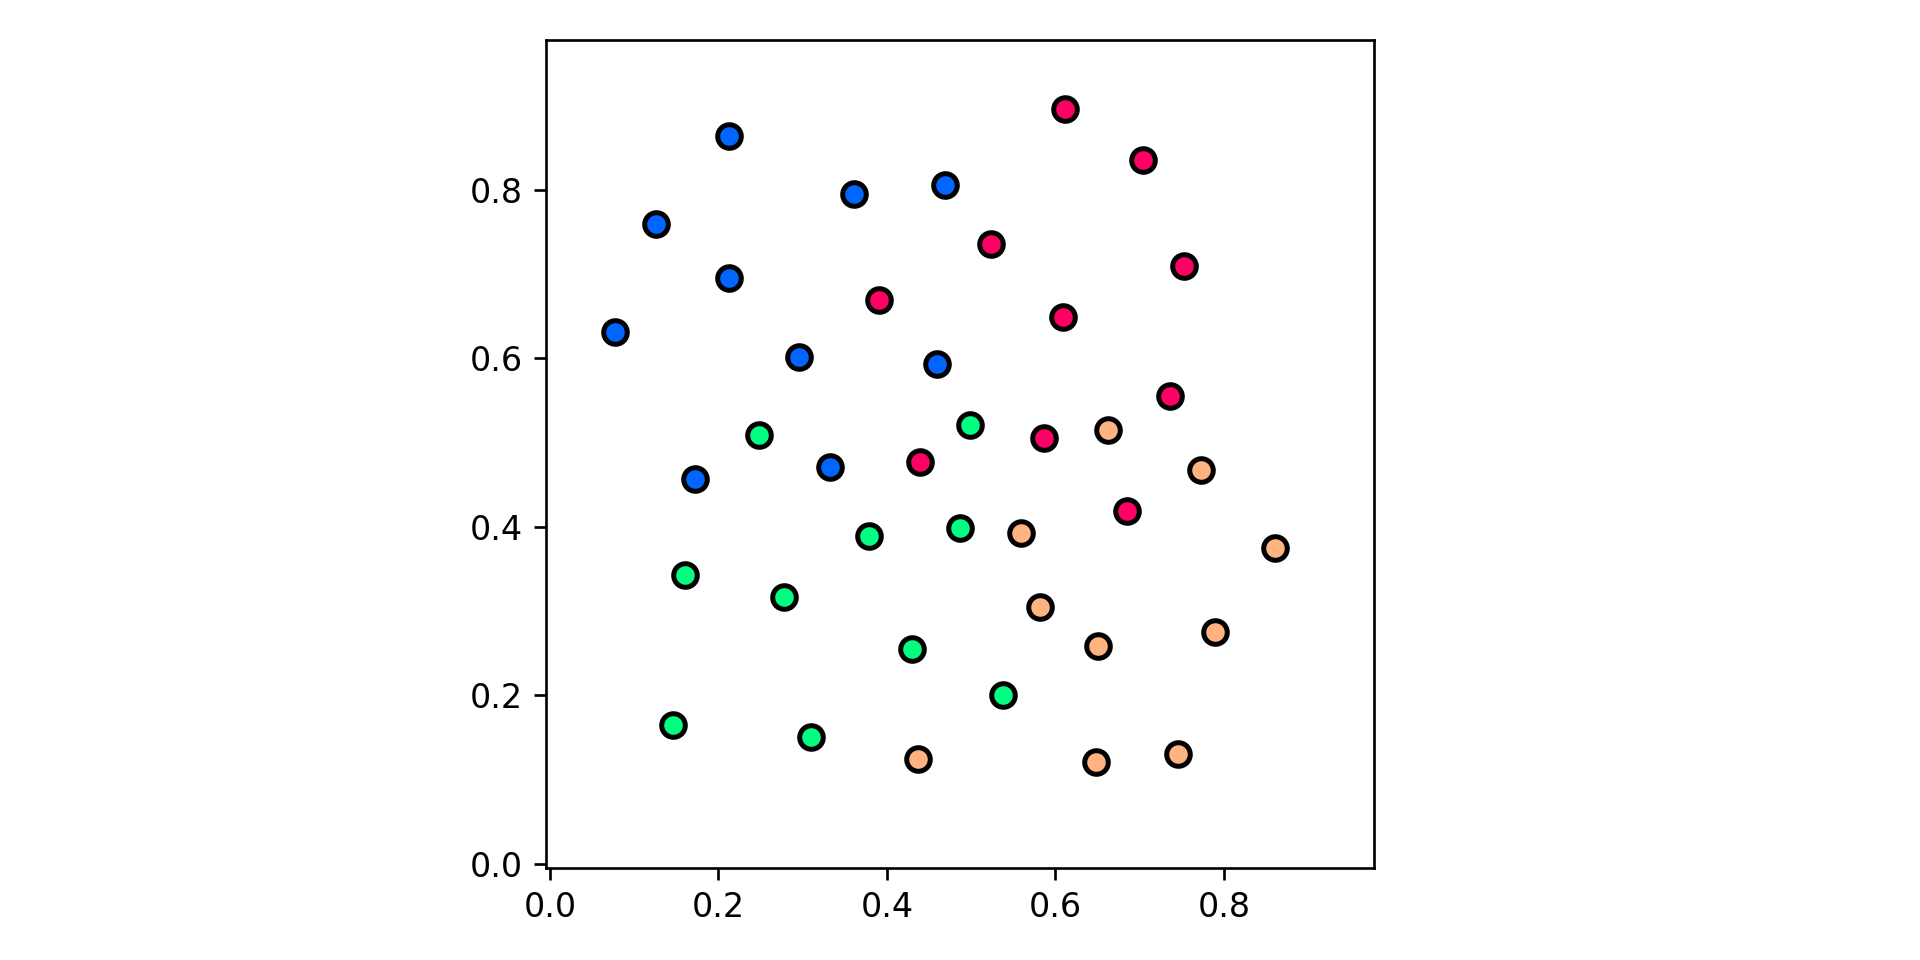

In [25]:
# load in dataset
data = np.loadtxt(datapath + '4class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# create an instance of the ova demo
demo = superlearn.multiclass_illustrator.Visualizer(data)

# visualize dataset
demo.show_dataset()

# run gradient descent to minimize cost
g = multiclass_softmax; w = 0.1*np.random.randn(3,4); max_its = 5; 
weight_history,cost_history = optimizers.newtons_method(g,max_its,w)

Finally, we plot our results, as in the previous Example.

<IPython.core.display.Javascript object>


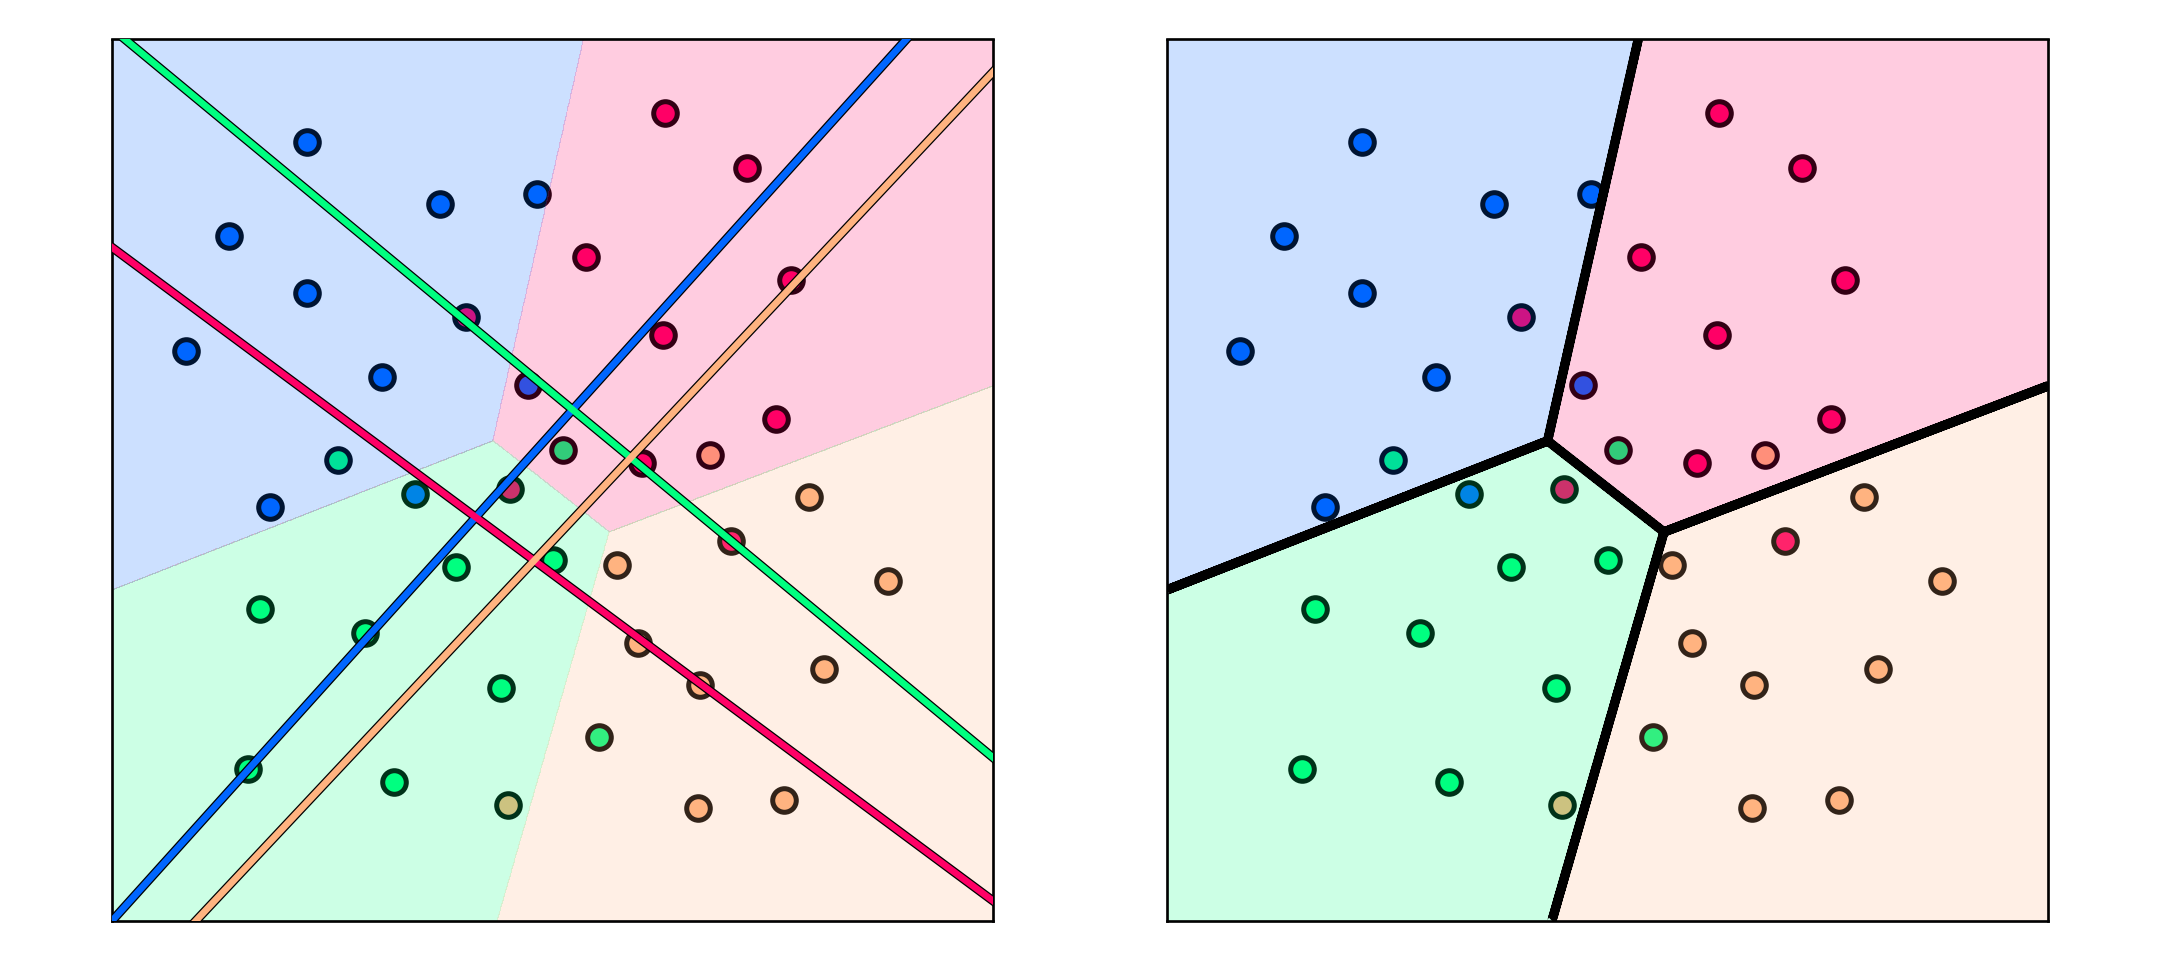

In [26]:
# This code cell will not be shown in the HTML version of this notebook
# plot classification of space, individual learned classifiers (left panel) and joint boundary (middle panel), and cost-function panel in the right panel
demo.show_complete_coloring(weight_history, cost = multiclass_softmax)

# Exercise 7.6. Show the multi-class Softmax reduces to two-class Softmax when $C=2$

With $C=2$ the multiclass softmax cost 

\begin{equation}
\underset{c=1}{\overset{C}{\sum}}\underset{p\in\Omega_{c}}{\sum}\mbox{log}\left(1+\underset{\underset{j\neq c}{j=1}}{\overset{C}{\sum}}e^{\left(b_{j}^{\,}-b_{c}^{\,}\right)+\mathbf{x}_{p}^{T}\left(\mathbf{w}_{j}^{\,}-\mathbf{w}_{c}^{\,}\right)}\right),
\end{equation}

reduces to \noindent
\begin{equation}
\underset{p\in\Omega_{1}}{\sum}\mbox{log}\left(1+e^{\left(b_{2}^{\,}-b_{1}^{\,}\right)+\mathbf{x}_{p}^{T}\left(\mathbf{w}_{2}^{\,}-\mathbf{w}_{1}^{\,}\right)}\right)+\underset{p\in\Omega_{2}}{\sum}\mbox{log}\left(1+e^{\left(b_{1}^{\,}-b_{2}^{\,}\right)+\mathbf{x}_{p}^{T}\left(\mathbf{w}_{1}^{\,}-\mathbf{w}_{2}^{\,}\right)}\right).
\end{equation}

Now note that because we have that $y_{p}=\left\{ \begin{array}{cc}
-1 & p\in\Omega_{1}\\
+1 & p\in\Omega_{2}
\end{array}\right.$, the cost in (\ref{eq:multiclass-softmax-common-1}) can be written
equivalently as \noindent
\begin{equation}
\underset{p\in\Omega_{1}}{\sum}\mbox{log}\left(1+e^{-y_{p}\left(\left(b_{2}^{\,}-b_{1}^{\,}\right)+\mathbf{x}_{p}^{T}\left(\mathbf{w}_{2}^{\,}-\mathbf{w}_{1}^{\,}\right)\right)}\right)+\underset{p\in\Omega_{2}}{\sum}\mbox{log}\left(1+e^{-y_{p}\left(\left(b_{2}^{\,}-b_{1}^{\,}\right)+\mathbf{x}_{p}^{T}\left(\mathbf{w}_{2}^{\,}-\mathbf{w}_{1}^{\,}\right)\right)}\right),
\end{equation}

which can then be written in a more compact form as \noindent
\begin{equation}
\underset{p=1}{\overset{P}{\sum}}\mbox{log}\left(1+e^{-y_{p}\left(\left(b_{2}^{\,}-b_{1}^{\,}\right)+\mathbf{x}_{p}^{T}\left(\mathbf{w}_{2}^{\,}-\mathbf{w}_{1}^{\,}\right)\right)}\right).
\end{equation}

Finally letting $b=b_{2}-b_{1}$ and $\mathbf{w}=\mathbf{w}_{2}^{\,}-\mathbf{w}_{1}^{\,}$,
we arrive at the familiar two-class softmax cost function \noindent
\begin{equation}
\underset{p=1}{\overset{P}{\sum}}\mbox{log}\left(1+e^{-y_{p}\left(b+\mathbf{x}_{p}^{T}\mathbf{w}\right)}\right).
\end{equation}

# Exercise 7.7. Hand-calculations with the multi-class Softmax cost

# Exercise 7.8. The multi-class Perceptron and Softmax costs are convex

Notice we always have that:
    
**I.** Addition of two (or more) convex functions is always convex.

**II.** Linear and affine functions are convex.

**III.** The max, exponential, and negative logarithm functions are all convex.

**IV.** Composition of two convex functions remains convex.

Each of the statements above can be verified easily using the following definition of convexity:

A function g is convex if and only if for all $\mathbf{w}_1$ and $\mathbf{w}_2$ in the domain of g and all $\lambda \in \left[0, 1\right]$, we have

\begin{equation}
g\left(\lambda \mathbf{w}_1+\left(1-\lambda\right) \mathbf{w}_2\right)\leq \lambda g\left(\mathbf{w}_1\right)+\left(1-\lambda\right) g\left(\mathbf{w}_2\right)
\end{equation}

With these four statements at hand, it is straight-forward to prove convexity of multi-class perceptron and softmax cost functions. 

# Exercise 7.9. Balanced accuracy in the multi-class setting

Suppose we have formed the $(C-1)\times(C-1)$ confusion matrix $\mathbf{Q}$ for a general $C$-class classification, where the $(i,j)$th entry $Q_{i,j}$ is the number of datapoints in class $i$ that have been assigned label $j$ by the classifier. 

Then the accuracy for class $i$ can be found as

$${\cal{A}}_{i} = \frac{Q_{i,i}}{\sum_{j=0}^{C-1} Q_{i,j}}$$

Averaging the accuracies for all $C$ classes we have

$$\text{balanced accuracy} = \frac{\sum_{i=0}^{C-1} {\cal{A}}_{i}}{C} = \frac{1}{C}\sum_{i=0}^{C-1} \frac{Q_{i,i}}{\sum_{j=0}^{C-1} Q_{i,j}}$$

# Exercise 7.10.  Weighted multi-class Softmax

In [ ]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib

# demos for this notebook
regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer()
datapath = '../../mlrefined_datasets/superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

- Remember: while the base of all regressions is to make the following hold by tuning $\mathbf{w}$
 
 
\begin{equation}
\text{model}\left(\mathbf{x}_p,\mathbf{w}\right) \approx y_p
\end{equation}


and for two-class classification (using $\pm 1$ labels)


\begin{equation}
\text{sign}\left(\text{model}\left(\mathbf{x}_p,\mathbf{w}\right)\right) \approx y_p
\end{equation}



- The analagous desire for multiclass classification is given by the *fusion rule*


\begin{equation}
y_p =  \underset{j \,=\, 0,...,C-1}{\text{argmax}}\,\text{model}_j\left(\mathbf{x}_p,\mathbf{w}^{\left(j\right)}\right)
\end{equation}

- Here we have a `model` for each of our $C$ classifiers (in the simplest instance these are linear)


- When we use a shared architecture / model $\mathbf{w}^{\left(j\right)}$ denotes the weights of the classifier-unique linear combination


- Weighting here works just as with regression / two-class classification, e.g., weighting a multiclass softmax / logistic regression cost looks like

\begin{equation}
g\left(\mathbf{w}\right) = -\frac{1}{P}\sum_{p = 1}^P \text{log}\left(\frac{e^{\text{model}_{y_p}\left(\mathbf{x}_p,\mathbf{w}^{\left(y_p\right)}\right)}}{\sum_{j = 0}^{C-1} e^{\text{model}_{j}\left(   \mathbf{x}_p,\mathbf{w}^{\left(j\right)}    \right)}  }\right)
\end{equation}

- The weighted version looks precisely as previous - an individual weight $\beta_p$ controls the contribution of the $p^{th}$ point in the summand 

\begin{equation}
g\left(\mathbf{w}\right) = -\frac{1}{P}\sum_{p = 1}^P \beta_p \, \text{log}\left(\frac{e^{\text{model}_{y_p}\left(\mathbf{x}_p,\mathbf{w}^{\left(y_p\right)}\right)}}{\sum_{j = 0}^{C-1} e^{\text{model}_{j}\left(   \mathbf{x}_p,\mathbf{w}^{\left(j\right)}    \right)}  }\right)
\end{equation}


- This is done for the same reasons listed with weighted two-class classification - commonly to deal with large class imbalances


- Our weightings determine *how important each datapoint is* in the training of the model

In [ ]:
# weighted multiclass softmax
def multiclass_softmax(self,w,x,y,beta,iter):     
    # get subset of points
    x_p = x[:,iter]
    y_p = y[:,iter]
    beta_p = beta[:,iter]

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(beta_p*(a - b))

    # return average
    return cost/float(np.size(y_p))

# Exercise 7.11.  Recognizing handwritten digits

Load in data.

In [80]:
# get MNIST data from online repository
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# convert string labels to integers
y = np.array([int(v) for v in y])[:,np.newaxis]

In [81]:
print("input shape = " , x.shape)
print("output shape = ", y.shape)

input shape =  (784, 70000)
output shape =  (1, 70000)


Randomly sample input / output pairs.

In [82]:
# sample indices
num_sample = 10000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

<IPython.core.display.Javascript object>


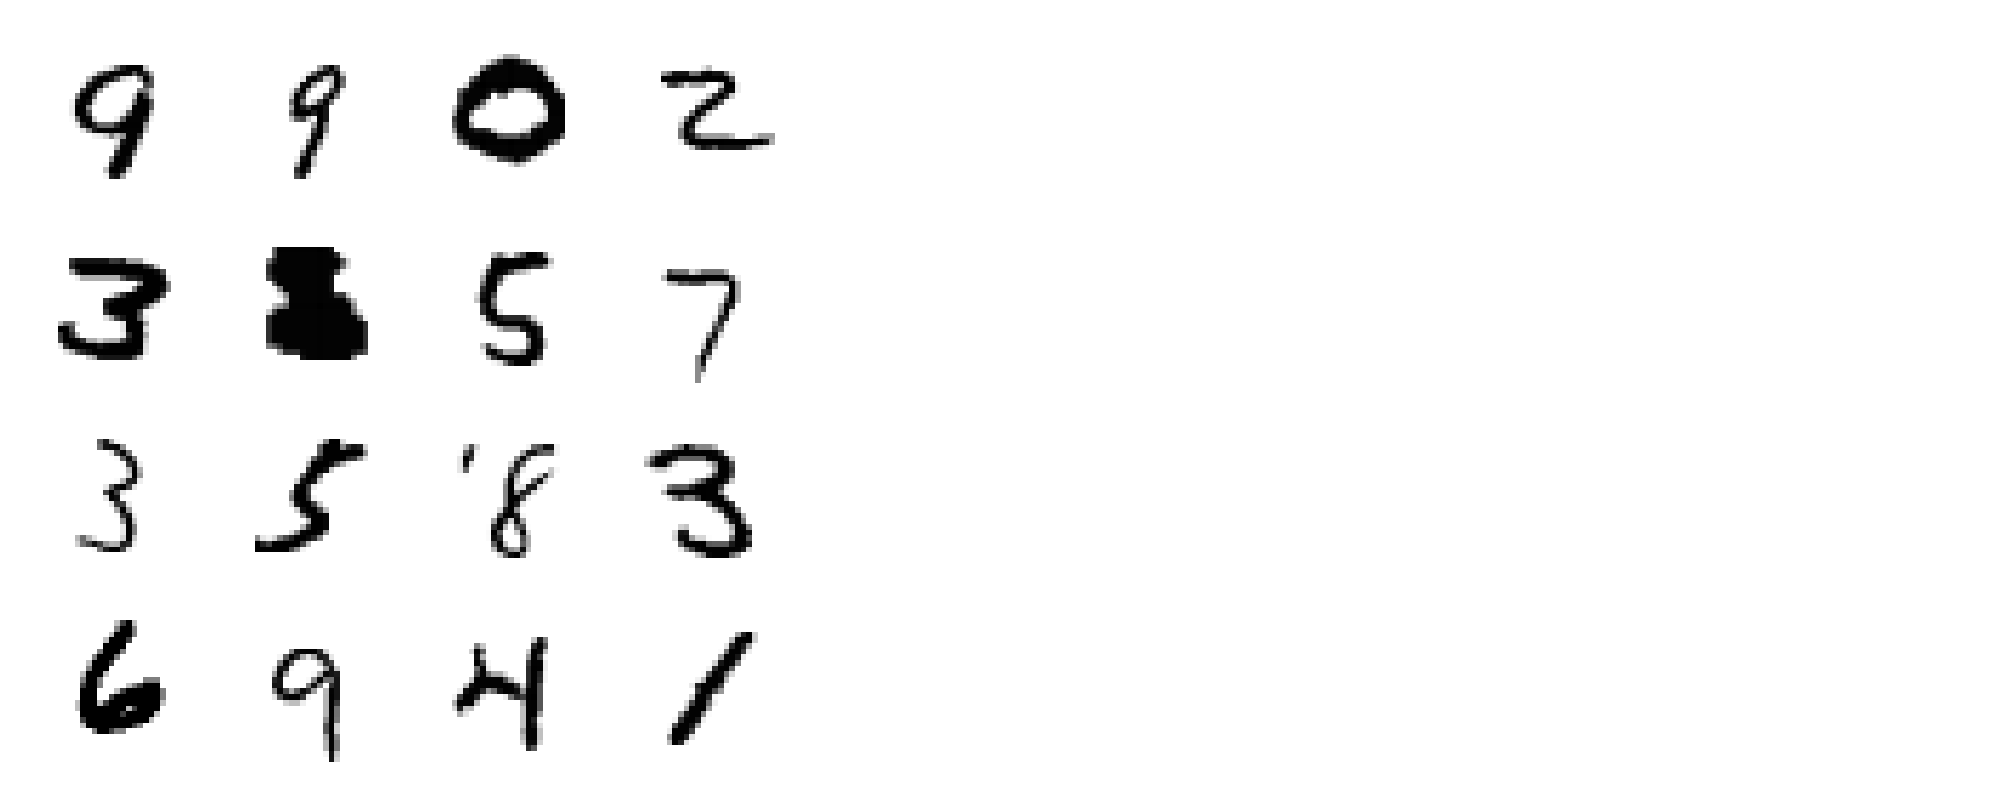

In [105]:
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,4))
gs=GridSpec(4,10)

for i in range(0, 16):
    fig.add_subplot(gs[i%4 + int(i/4)*10])
    plt.imshow(np.max(x_sample[:,i]) - np.reshape(x_sample[:,i],(28,28)), cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.axis('off') 
plt.show()

Implementation of multi-class cost and gradient descent optimizer that takes in mini-batches.

In [58]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
def multiclass_perceptron(w,x,y,iter):
    # get subset of points
    x_p = x[:,iter]
    y_p = y[:,iter]

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute maximum across data points
    a =  np.max(all_evals,axis = 0)        

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_p))

In [59]:
from autograd.misc.flatten import flatten_func
from autograd import grad as gradient 
from timeit import default_timer as timer

# minibatch gradient descent
def gradient_descent(g,w,x_train,y_train,alpha,max_its,batch_size,**kwargs): 
    verbose = True
    if 'verbose' in kwargs:
        verbose = kwargs['verbose']
    
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = gradient(g_flat)

    # record history
    num_train = y_train.size
    w_hist = [unflatten(w)]
    train_hist = [g_flat(w,x_train,y_train,np.arange(num_train))]

    # how many mini-batches equal the entire dataset?
    num_batches = int(np.ceil(np.divide(num_train, batch_size)))

    # over the line
    for k in range(max_its):                   
        # loop over each minibatch
        start = timer()
        train_cost = 0
        for b in range(num_batches):
            # collect indices of current mini-batch
            batch_inds = np.arange(b*batch_size, min((b+1)*batch_size, num_train))
            
            # plug in value into func and derivative
            grad_eval = grad(w,x_train,y_train,batch_inds)
            grad_eval.shape = np.shape(w)
    
            # take descent step with momentum
            w = w - alpha*grad_eval

        end = timer()
        
        # update training and validation cost
        train_cost = g_flat(w,x_train,y_train,np.arange(num_train))

        # record weight update, train and val costs
        w_hist.append(unflatten(w))
        train_hist.append(train_cost)

        if verbose == True:
            print ('step ' + str(k+1) + ' done in ' + str(np.round(end - start,1)) + ' secs, train cost = ' + str(np.round(train_hist[-1][0],4)))

    if verbose == True:
        print ('finished all ' + str(max_its) + ' steps')
        #time.sleep(1.5)
        #clear_output()
    return w_hist,train_hist

Run minimization.

In [68]:
# parameters for general run
g = multiclass_perceptron
alpha = 10**(-3)
max_its = 5
N = x_sample.shape[0]
C = len(np.unique(y_sample))
w = 0.1*np.random.randn(N+1,C)

# make first run
batch_size = 200
weight_history_1,cost_history_1 = gradient_descent(g,w,x_sample,y_sample,alpha,max_its,batch_size,verbose=False)

# make second run
batch_size = y_sample.shape[1]
weight_history_2,cost_history_2 = gradient_descent(g,w,x_sample,y_sample,alpha,max_its,batch_size,verbose=False)

In [77]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure(figsize=(9,3))
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='upper right')
    plt.title('cost function history comparison')
    plt.xlabel('iteration')
    plt.ylabel('cost function value',rotation = 90)
    plt.show()

<IPython.core.display.Javascript object>


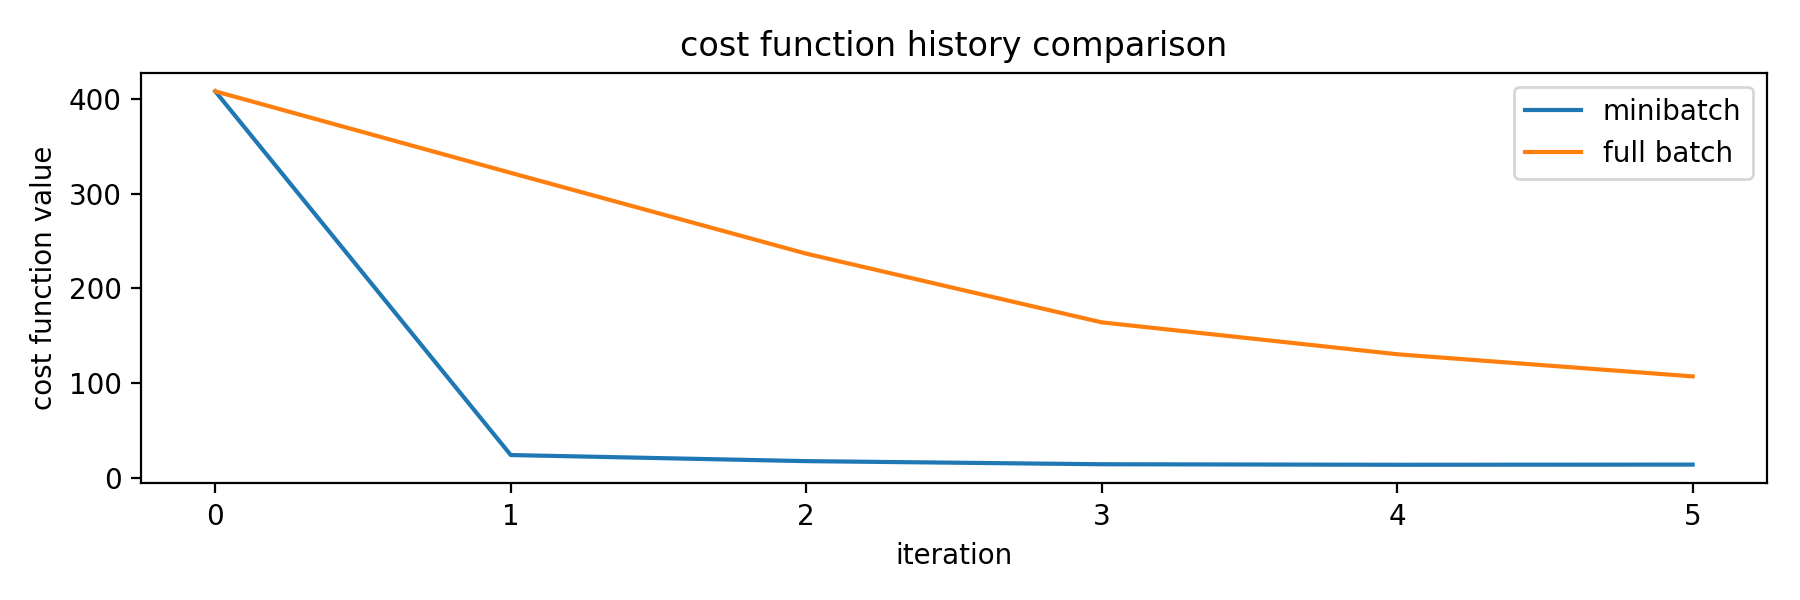

In [78]:
cost_histories = [cost_history_1,cost_history_2]
labels = ['minibatch','full batch']
plot_cost_histories(cost_histories,labels)